In [1]:

from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.metrics import roc_curve
#from roc import plot_roc
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
from sklearn.cross_validation import train_test_split

%matplotlib inline

/Applications/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_json('data/subset.json')

# Convert dates

In [3]:

df['approx_payout_date'] = df['approx_payout_date'].astype('datetime64[s]') 
df['event_created'] = df['event_created'].astype('datetime64[s]') 
df['event_end'] = df['event_end'].astype('datetime64[s]') 
df['event_published'] = df['event_published'].astype('datetime64[s]') 
df['event_start'] = df['event_start'].astype('datetime64[s]') 
df['user_created'] = df['user_created'].astype('datetime64[s]') 


# Drop fields

In [4]:
del df['approx_payout_date']
del df['event_created']
del df['event_end']
del df['event_published'] 
del df['event_start']
del df['previous_payouts']
del df['venue_latitude']
del df['venue_longitude']


del df['description']
del df['email_domain']
del df['name']
del df['org_desc']
del df['org_name']
del df['payee_name']
del df['ticket_types']
del df['venue_address']
del df['venue_name']


del_columns = ['approx_payout_date', 'event_created','event_end','event_published','event_start','previous_payouts','venue_latitude',
'venue_longitude','description','email_domain','name','org_desc','org_name','payee_name','ticket_types','venue_address','venue_name']

# Null values?
Fill in with 'Unknown' or 0

In [5]:
df['has_header'] = df['has_header'].fillna(0) 
df['venue_country'] = df['venue_country'].fillna('Unknown') 
df['venue_state'] = df['venue_state'].fillna('Unknown') 
df['payout_type'] - df['payout_type'].fillna('Unknown')


In [6]:
# df['payout_type'] = df['payout_type'].fillna('Unknown')
# df['payout_type'].value_counts()

for i,j in enumerate(df['payout_type']):
    if j == '':
        df['payout_type'][i] = 'Unknown'

#df['payout_type'][0]

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Add target column from acct_type

In [9]:
df['Fraud'] = df['acct_type'].apply(lambda x: x == 'fraudster'or x == 'fraudster_event')
df['Fraud'] = df['Fraud'].apply(lambda x: 1 if x == True else 0)
df.head(5)

,acct_type,body_length,channels,country,currency,delivery_method,fb_published,gts,has_analytics,has_header,...,payout_type,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,venue_country,venue_state,Fraud
0,fraudster_event,3852,5,US,USD,0,0,0.00,0,1.0,...,Unknown,29,33,1,36,2009-11-30 20:45:50,1,US,FL,1
1,premium,3499,0,US,USD,1,0,868.02,0,0.0,...,CHECK,28,28,0,149,2010-08-04 17:26:16,3,US,SC,0
2,premium,2601,8,US,USD,1,0,3500.00,0,0.0,...,CHECK,54,54,0,214,2010-04-29 16:43:08,3,US,CA,0
3,premium,12347,6,IE,EUR,1,0,1167.35,0,0.0,...,ACH,0,0,0,889,2010-09-07 14:35:02,3,Unknown,Unknown,0
4,premium,2417,11,US,USD,0,1,2313.15,0,0.0,...,CHECK,63,63,0,35,2010-11-05 19:07:45,3,US,MA,0


In [63]:
#remove acct_type column
#del df['acct_type']
df.columns

Index([    u'body_length',        u'channels',         u'country',
              u'currency', u'delivery_method',    u'fb_published',
                   u'gts',   u'has_analytics',      u'has_header',
              u'has_logo',          u'listed',     u'name_length',
             u'num_order',     u'num_payouts',       u'object_id',
          u'org_facebook',     u'org_twitter',     u'payout_type',
         u'sale_duration',  u'sale_duration2',        u'show_map',
              u'user_age',       u'user_type',   u'venue_country',
           u'venue_state',           u'Fraud'],
      dtype='object')

In [18]:
df['country'].value_counts()
#df.columns

US    81
GB     9
CA     5
AU     2
IE     1
FR     1
       1
Name: country, dtype: int64

# Make dumb model

In [11]:
dfnew = pd.get_dummies(df,drop_first=True)

In [35]:
del dfnew['user_created']
dfnew.columns

Index([u'body_length', u'channels', u'delivery_method', u'fb_published',
       u'gts', u'has_analytics', u'has_header', u'has_logo', u'name_length',
       u'num_order', u'num_payouts', u'object_id', u'org_facebook',
       u'org_twitter', u'sale_duration', u'sale_duration2', u'show_map',
       u'user_age', u'user_type', u'country_AU', u'country_CA', u'country_FR',
       u'country_GB', u'country_IE', u'country_US', u'currency_CAD',
       u'currency_EUR', u'currency_GBP', u'currency_USD', u'listed_y',
       u'payout_type_CHECK', u'payout_type_Unknown', u'venue_country_AU',
       u'venue_country_CA', u'venue_country_FR', u'venue_country_GB',
       u'venue_country_US', u'venue_country_Unknown', u'venue_state_AL',
       u'venue_state_AZ', u'venue_state_Alberta', u'venue_state_Bournemouth',
       u'venue_state_British Columbia', u'venue_state_CA', u'venue_state_DC',
       u'venue_state_FL', u'venue_state_GA', u'venue_state_IA',
       u'venue_state_IL', u'venue_state_IN', u'venue_

In [36]:
dfnew.head().T

,0,1,2,3,4
body_length,3852.0,3499.00,2601.0,12347.00,2417.00
channels,5.0,0.00,8.0,6.00,11.00
delivery_method,0.0,1.00,1.0,1.00,0.00
fb_published,0.0,0.00,0.0,0.00,1.00
gts,0.0,868.02,3500.0,1167.35,2313.15
has_analytics,0.0,0.00,0.0,0.00,0.00
has_header,1.0,0.00,0.0,0.00,0.00
has_logo,0.0,1.00,0.0,1.00,0.00
name_length,60.0,27.00,28.0,21.00,66.00
num_order,0.0,23.00,19.0,39.00,30.00


In [38]:
#Make a numpy array called y containing the fraud values
y = dfnew.pop('Fraud').values
#Make a 2 dimensional numpy array containing the feature data (everything except the labels)
X = dfnew.values
print y
print X


[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[  3.85200000e+03   5.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  3.49900000e+03   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.60100000e+03   8.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  1.86000000e+03   5.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.21900000e+03   1.10000000e+01   1.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.24790000e+04   8.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


In [39]:
#Use sklearn's train_test_split to split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
#X_train.any()
#X_train.shape
#np.argwhere(np.isnan(X_train))
for i in X_train:
    print i

[  1.48300000e+03   6.00000000e+00   0.00000000e+00   1.00000000e+00
   5.52900000e+01   0.00000000e+00   0.00000000e+00   1.00000000e+00
   4.90000000e+01   2.00000000e+00   1.00000000e+01   2.58961400e+06
   1.10000000e+01   1.20000000e+01   9.00000000e+00   9.00000000e+00
   1.00000000e+00   6.82000000e+02   4.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.00000000e+00   1.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

In [41]:
# Use sklearn's RandomForestClassifier to build a model of your data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [42]:
print "8. score:", rf.score(X_test, y_test)

8. score: 0.88


In [44]:
len(X_test)

25

In [43]:
# 9. Draw a confusion matrix for the results
y_predict = rf.predict(X_test)
print "confusion matrix:"
print confusion_matrix(y_test, y_predict)

confusion matrix:
[[22  0]
 [ 3  0]]


In [45]:
#What is the precision? Recall?
print "10. precision:", precision_score(y_test, y_predict)
print "    recall:", recall_score(y_test, y_predict)

10. precision: 0.0
    recall: 0.0


/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [46]:
# Build the RandomForestClassifier again setting the out of bag parameter to be true
rf = RandomForestClassifier(n_estimators=30, oob_score=True)
rf.fit(X_train, y_train)
print "11: accuracy score:", rf.score(X_test, y_test)
print "    out of bag score:", rf.oob_score_

11: accuracy score: 0.88
    out of bag score: 0.973333333333


In [47]:
#Use sklearn's model to get the feature importances
feature_importances = np.argsort(rf.feature_importances_)
print "top five:", list(df.columns[feature_importances[-1:-6:-1]])

top five:

IndexError: index 45 is out of bounds for axis 1 with size 26

In [51]:
feature_importances

array([34, 68, 37, 38, 39, 40, 41, 42, 44, 46, 47, 49, 50, 33, 51, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 53, 32, 69, 20, 19, 21, 25,
       23, 26, 29, 52, 66, 36, 65,  2,  3, 43, 28,  8,  7, 24,  1, 12, 48,
       27, 35, 22, 30, 16,  6, 10, 11, 31,  9,  5, 15, 13,  0, 17, 18, 14,
       45,  4])

In [53]:
dfnew.columns[feature_importances]

Index([u'venue_country_FR', u'venue_state_VA', u'venue_country_Unknown',
       u'venue_state_AL', u'venue_state_AZ', u'venue_state_Alberta',
       u'venue_state_Bournemouth', u'venue_state_British Columbia',
       u'venue_state_DC', u'venue_state_GA', u'venue_state_IA',
       u'venue_state_IN', u'venue_state_KY', u'venue_country_CA',
       u'venue_state_London', u'venue_state_MD', u'venue_state_ME',
       u'venue_state_MI', u'venue_state_MN', u'venue_state_NC',
       u'venue_state_NY', u'venue_state_New South Wales', u'venue_state_OH',
       u'venue_state_Ontario', u'venue_state_PA', u'venue_state_SC',
       u'venue_state_Unknown', u'venue_state_MASSACHUSETTS',
       u'venue_country_AU', u'venue_state_WA', u'country_CA', u'country_AU',
       u'country_FR', u'currency_CAD', u'country_IE', u'currency_EUR',
       u'listed_y', u'venue_state_MA', u'venue_state_TX', u'venue_country_US',
       u'venue_state_Suffolk', u'delivery_method', u'fb_published',
       u'venue_state_CA', 

In [56]:
indices = np.argsort(feature_importances)[::-1]


In [60]:
print feature_importances
print indices
print dfnew.columns[indices]

[34 68 37 38 39 40 41 42 44 46 47 49 50 33 51 54 55 56 57 58 59 60 61 62 63
 64 67 53 32 69 20 19 21 25 23 26 29 52 66 36 65  2  3 43 28  8  7 24  1 12
 48 27 35 22 30 16  6 10 11 31  9  5 15 13  0 17 18 14 45  4]
[29  1 26 38 40 25 24 23 22 21 20 19 18 17 16 15 27 37 14 12 11 50 10  9 68
  8 43  7  6  5  4  3  2 39 52  0 13 28 59 54 36 44 51 35 33 47 34 53 32 30
 31 66 65 55 62 67 63 49 58 57 60 45 46 56 61 69 42 41 48 64]
Index([u'listed_y', u'channels', u'currency_EUR', u'venue_state_AL',
       u'venue_state_Alberta', u'currency_CAD', u'country_US', u'country_IE',
       u'country_GB', u'country_FR', u'country_CA', u'country_AU',
       u'user_type', u'user_age', u'show_map', u'sale_duration2',
       u'currency_GBP', u'venue_country_Unknown', u'sale_duration',
       u'org_facebook', u'object_id', u'venue_state_KY', u'num_payouts',
       u'num_order', u'venue_state_VA', u'name_length', u'venue_state_CA',
       u'has_logo', u'has_header', u'has_analytics', u'gts', u'fb_published'

features  Index([u'body_length', u'channels', u'delivery_method', u'fb_published',
       u'gts', u'has_analytics', u'has_header', u'has_logo', u'name_length',
       u'num_order', u'num_payouts', u'object_id', u'org_facebook',
       u'org_twitter', u'sale_duration', u'sale_duration2', u'show_map',
       u'user_age', u'user_type', u'country_AU', u'country_CA', u'country_FR',
       u'country_GB', u'country_IE', u'country_US', u'currency_CAD',
       u'currency_EUR', u'currency_GBP', u'currency_USD', u'listed_y',
       u'payout_type_CHECK', u'payout_type_Unknown', u'venue_country_AU',
       u'venue_country_CA', u'venue_country_FR', u'venue_country_GB',
       u'venue_country_US', u'venue_country_Unknown', u'venue_state_AL',
       u'venue_state_AZ', u'venue_state_Alberta', u'venue_state_Bournemouth',
       u'venue_state_British Columbia', u'venue_state_CA', u'venue_state_DC',
       u'venue_state_FL', u'venue_state_GA', u'venue_state_IA',
       u'venue_state_IL', u'venue_state_IN'

(-1, 10)

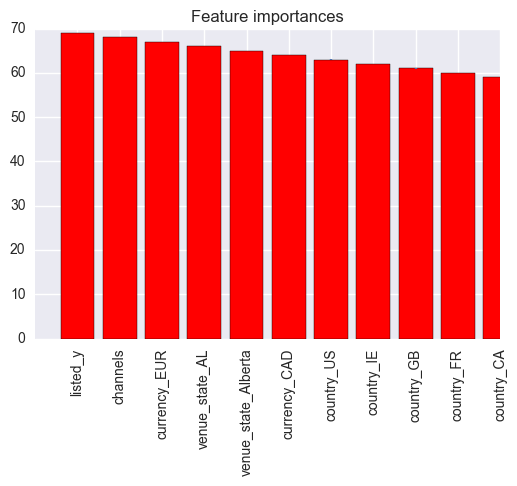

In [61]:
#Calculate the standard deviation for feature importances across all trees

n = len(dfnew.columns) # top 10 features

#importances = rf.feature_importances_#[:n]
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
#indices = np.argsort(importances)[::-1]
print 'features ', dfnew.columns
print 'importances', feature_importances
print 'indices', indices
print 'std', std

# Print the feature ranking
print("Feature ranking:")

for f in range(n):
    print f
    print f + 1, dfnew.columns[f], feature_importances[indices[f]]

# Plot the feature importances of the forest
labels = dfnew.columns[indices]
#plt.figure()
plt.title("Feature importances")
plt.bar(range(n), feature_importances[indices], yerr=std[indices], color="r", align="center")
plt.xticks(range(n), labels, rotation='vertical') #indices)

plt.xlim([-1, 10])
#plt.show()

In [62]:
# Run all the other classifiers that we have learned so far in class
def get_scores(classifier, X_train, X_test, y_train, y_test, **kwargs):
    model = classifier(**kwargs)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return model.score(X_test, y_test), \
           precision_score(y_test, y_predict), \
           recall_score(y_test, y_predict)

print "Model, Accuracy, Precision, Recall"
print "    Random Forest:", get_scores(RandomForestClassifier, X_train, X_test, y_train, y_test, n_estimators=25, max_features=5)
print "    Logistic Regression:", get_scores(LogisticRegression, X_train, X_test, y_train, y_test)
print "    Decision Tree:", get_scores(DecisionTreeClassifier, X_train, X_test, y_train, y_test)
print "    SVM:", get_scores(SVC, X_train, X_test, y_train, y_test)
print "    Naive Bayes:", get_scores(MultinomialNB, X_train, X_test, y_train, y_test)

Model, Accuracy, Precision, Recall
    Random Forest: (0.88, 0.0, 0.0)
    Logistic Regression: (0.88, 0.0, 0.0)
    Decision Tree: (0.83999999999999997, 0.0, 0.0)
    SVM: (0.88, 0.0, 0.0)
    Naive Bayes: (0.76000000000000001, 0.0, 0.0)
